In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


In [2]:
(mnist_train_original, mnist_validate_original, mnist_test_original), info = \
tfds.load('mnist', split=['train[:80%]', 'train[80%:]', 'test'], with_info=True, as_supervised=True)

In [3]:
info

tfds.core.DatasetInfo(
    name='mnist',
    version=3.0.1,
    description='The MNIST database of handwritten digits.',
    homepage='http://yann.lecun.com/exdb/mnist/',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
    redistribution_info=,
)

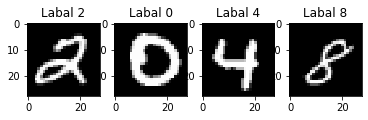

In [4]:
index = 1
for mnist_example in mnist_test_original.take(4):
    image, label = mnist_example
    
    plt.subplot(1, 4, index)
    plt.imshow(image.numpy()[:, :, 0], cmap='gray')
    plt.title(f'Labal {label.numpy()}')
    index += 1

plt.show()
plt.close()

In [5]:
labels = list(mnist_train_original.map(lambda image, label: label))
label = [x.numpy() for x in labels]

(array([4754., 5389., 4778., 4901., 4660., 4350., 4721., 5003., 4675.,
        4769.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

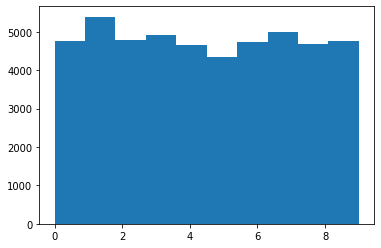

In [6]:
plt.hist(labels)

In [7]:
def encode(image, label):
    image_encoded = tf.image.convert_image_dtype(image, dtype=tf.float32)
    label_encoded = tf.one_hot(label, depth=10)
    return image_encoded, label_encoded

In [8]:
minst_train = mnist_train_original.map(lambda image, label: encode(image, label)).cache()
minst_validate = mnist_validate_original.map(lambda image, label: encode(image, label)).cache()
minst_test = mnist_test_original.map(lambda image, label: encode(image, label)).cache()

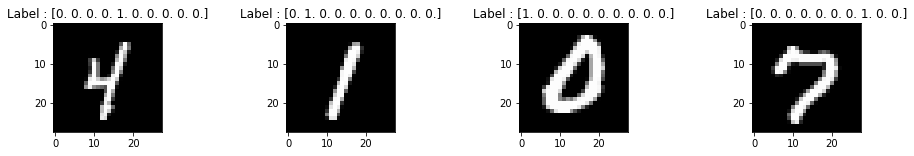

In [9]:
index = 1
plt.figure(figsize=(16, 2))
for mnist_example in minst_train.take(4):
    image, label = mnist_example
    
    plt.subplot(1, 4, index)
    plt.imshow(image.numpy()[:, :, 0], cmap='gray')
    plt.title(f'Label : {label.numpy()}')
    index += 1

In [10]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28, 1)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()


model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy']  )

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [11]:
loss, accuracy  = model.evaluate(minst_test.batch(32))
loss, accuracy

313/313 [==============================] - 1s 4ms/step - loss: 2.2958 - accuracy: 0.1115


(2.295804977416992, 0.11150000244379044)

In [12]:
history = model.fit(minst_train.shuffle(10000).batch(32), epochs=5, validation_data=minst_validate.batch(32))

Epoch 1/5
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2228 - accuracy: 0.9332 - val_loss: 0.1542 - val_accuracy: 0.9551
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0966 - accuracy: 0.9717 - val_loss: 0.1070 - val_accuracy: 0.9723
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0688 - accuracy: 0.9799 - val_loss: 0.1002 - val_accuracy: 0.9760
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0548 - accuracy: 0.9847 - val_loss: 0.1057 - val_accuracy: 0.9755
Epoch 5/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0410 - accuracy: 0.9887 - val_loss: 0.1084 - val_accuracy: 0.9767


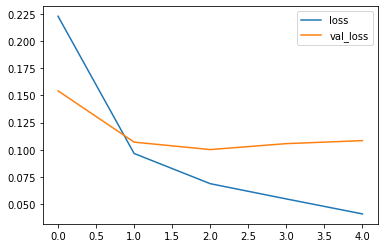

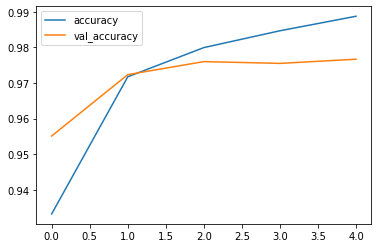

In [13]:
plt.plot(model.history.history['loss'], label='loss')
plt.plot(model.history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.close()

plt.plot(model.history.history['accuracy'], label='accuracy')
plt.plot(model.history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()
plt.close()

In [14]:
loss, accuracy  = model.evaluate(minst_test.batch(32))
loss, accuracy

313/313 [==============================] - 1s 2ms/step - loss: 0.0942 - accuracy: 0.9777: 0s - loss: 0.1012 - accuracy: 


(0.0942378044128418, 0.9776999950408936)